In [1]:
import numpy as np 
import pandas as pd 
import re , string
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, pairwise_distances
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
# import sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity



import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
recipes_df = pd.read_json("/Users/fatimahgh/desktop/recipes_raw_nosource_ar.json")

In [3]:
recipes_df.to_csv(r"/Users/fatimahgh/desktop/recipes.csv")

In [4]:
recipes_df.shape

(4, 39802)

In [5]:
recipes_df.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [6]:
#transpose 
recipes_df=recipes_df.T 
recipes_df.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [7]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39802 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39522 non-null  object
 1   ingredients   39522 non-null  object
 2   instructions  39522 non-null  object
 3   picture_link  39522 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [8]:
# we don't want the scraped link as index so we will reset it
recipes_df.index = range(len(recipes_df))
recipes_df.head() 

,title,ingredients,instructions,picture_link
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [9]:
#we don't need picture_link column so we drop it
recipes=recipes_df.loc[:,['title','ingredients','instructions']] 

recipes.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [10]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39522 non-null  object
 1   ingredients   39522 non-null  object
 2   instructions  39522 non-null  object
dtypes: object(3)
memory usage: 933.0+ KB


In [11]:
# check for null values
recipes.isnull().sum() 

title           280
ingredients     280
instructions    280
dtype: int64

In [12]:
#drop null values
recipes=recipes.dropna(how='any')
recipes

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
...,...,...,...
39797,Thai-Indian Veggie Soup,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...",Heat oil in a large pot over medium heat. Add ...
39798,Coconut Milk-Free Panang Curry Chicken,"[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...",Heat cream and coconut extract in a skillet or...
39799,Cooked Cold Salad,"[3 tablespoons bacon grease ADVERTISEMENT, 2 c...",Heat bacon grease in a skillet over medium-hig...
39800,Easy Eggnog Creme Brulee,"[4 egg yolks ADVERTISEMENT, 1 tablespoon white...",Preheat oven to 350 degrees F (175 degrees C)....


In [13]:
# check for null values
recipes.isnull().sum() 

title           0
ingredients     0
instructions    0
dtype: int64

In [14]:
recipes_ingredients=recipes['ingredients']

In [15]:
recipes_ingredients= recipes_ingredients.astype(str)

In [16]:
# ice cubes 
# soy sauce
# gluten free 
# olive oil
# canola oil
# vegetable oil 
# coconut oil

In [17]:
# # word_tokenize(recipes_ingredients)

# def custom_tokenize(text):
#     return word_tokenize(text)

# recipes_ingredients = recipes_ingredients.apply(custom_tokenize)

In [18]:
recipes_ingredients.iloc[1]

"['2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT', '1 (1 ounce) package dry onion soup mix ADVERTISEMENT', '1 1/4 cups water ADVERTISEMENT', '5 1/2 pounds pot roast ADVERTISEMENT', 'ADVERTISEMENT']"

In [19]:
# lets start to remove the digits in the ingredients col
def remove_digits(s):
    s = re.sub(r'[\d]','',str(s))#replace digits with empty str
    return s 

recipes_ingredients=recipes_ingredients.apply(remove_digits)

In [20]:
recipes_ingredients.iloc[1]

"[' (. ounce) cans condensed cream of mushroom soup ADVERTISEMENT', ' ( ounce) package dry onion soup mix ADVERTISEMENT', ' / cups water ADVERTISEMENT', ' / pounds pot roast ADVERTISEMENT', 'ADVERTISEMENT']"

In [21]:
# Replace punctuations with a white space
def remove_punctuations(p):
    p = re.sub('[%s]' % re.escape(string.punctuation), ' ', str(p))
    return p

recipes_ingredients=recipes_ingredients.apply(remove_punctuations)

In [22]:
recipes_ingredients.iloc[1]

'      ounce  cans condensed cream of mushroom soup ADVERTISEMENT       ounce  package dry onion soup mix ADVERTISEMENT       cups water ADVERTISEMENT       pounds pot roast ADVERTISEMENT    ADVERTISEMENT  '

In [23]:
# pay attention to the word ADVERTISEMENT shows up a lot so we will add it
# to the english stopwords before we remove them from the ingredients

In [24]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
english_stopwords = stopwords.words('english')
len(english_stopwords)

179

In [26]:
english_stopwords.extend(['ADVERTISEMENT', 'advertisement']) 
print(len(english_stopwords))

181


In [27]:
# we found these recipe_stopwords online and we use it
recipe_stopwords= ["fresh","chopped","large","all-purpose","grated","freshly","crushed","minced","skinless"
           "sodium","low","diced","unsalted","coarse","low-fat","medium","powdered","finely","fine",
           "pitted","plain","low-fat","full-fat","nonfat","fat-free"]
len(recipe_stopwords)


24

In [28]:
our_stopwords = english_stopwords + recipe_stopwords
print(len(our_stopwords))

205


In [29]:
our_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Extract features from the text
# count_vectorizer

corpus = recipes_ingredients

count_vectorizer = CountVectorizer(stop_words = our_stopwords)
ingr_ct = count_vectorizer.fit_transform(corpus)

print(count_vectorizer.get_feature_names())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fat', 'free', 'full', 'purpose'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['abalone', 'absinthe', 'absolut', 'abuelita', 'ac', 'acado', 'acai', 'accent', 'accents', 'accompaniments', 'according', 'achiote', 'acid', 'acidity', 'acids', 'acini', 'acorn', 'across', 'act', 'active', 'activedry', 'adams', 'add', 'added', 'addition', 'additional', 'additions', 'adjust', 'adjustable', 'adobo', 'adzuki', 'aerated', 'african', 'agar', 'agave', 'age', 'aged', 'ahead', 'ahi', 'aid', 'aidells', 'aioli', 'air', 'airheads', 'aisle', 'aji', 'ajicitos', 'ajies', 'al', 'alaska', 'alaskan', 'albacore', 'alcaparrado', 'alcohol', 'alder', 'ale', 'aleppo', 'alessi', 'alexia', 'alfalfa', 'alfredo', 'alligator', 'allspice', 'allwhites', 'almond', 'almondmilk', 'almonds', 'almost', 'aloe', 'aloha', 'along', 'alouette', 'alphabet', 'already', 'alternative', 'alum', 'aluminum', 'amaranth', 'amaretti', 'amaretto', 'amarillo', 'amaro', 'amaz', 'amber', 'amberjack', 'amchoor', 'amchur', 'amer', 'american', 'amino', 'aminos', 'amish', 'ammonia', 'amontillado', 'amount', 'amsterdam', 'ana

In [31]:
# TF-IDF vectorizer

tf_vectorizer = TfidfVectorizer(stop_words = our_stopwords)
ingr_tfidf = tf_vectorizer.fit_transform(corpus)

print(tf_vectorizer.get_feature_names())

['abalone', 'absinthe', 'absolut', 'abuelita', 'ac', 'acado', 'acai', 'accent', 'accents', 'accompaniments', 'according', 'achiote', 'acid', 'acidity', 'acids', 'acini', 'acorn', 'across', 'act', 'active', 'activedry', 'adams', 'add', 'added', 'addition', 'additional', 'additions', 'adjust', 'adjustable', 'adobo', 'adzuki', 'aerated', 'african', 'agar', 'agave', 'age', 'aged', 'ahead', 'ahi', 'aid', 'aidells', 'aioli', 'air', 'airheads', 'aisle', 'aji', 'ajicitos', 'ajies', 'al', 'alaska', 'alaskan', 'albacore', 'alcaparrado', 'alcohol', 'alder', 'ale', 'aleppo', 'alessi', 'alexia', 'alfalfa', 'alfredo', 'alligator', 'allspice', 'allwhites', 'almond', 'almondmilk', 'almonds', 'almost', 'aloe', 'aloha', 'along', 'alouette', 'alphabet', 'already', 'alternative', 'alum', 'aluminum', 'amaranth', 'amaretti', 'amaretto', 'amarillo', 'amaro', 'amaz', 'amber', 'amberjack', 'amchoor', 'amchur', 'amer', 'american', 'amino', 'aminos', 'amish', 'ammonia', 'amontillado', 'amount', 'amsterdam', 'ana

In [32]:
# # MATRIX FACTORIZATION
# # ! This is a standard machine learning approach that can also be used for topic modeling
# # ! We will review two techniques:
# # ! Latent Semantic Analysis (LSA)
# # ! Non-Negative Matrix Factorization (NMF)

# Input: Count Vectorizer or TF-IDF Vectorizer ! Parameters to Tune:
# ! Number of Topics
# ! Text Preprocessing (stop words, min / max doc freq, parts of speech...) ! Output: U Matrix (terms —> topics) and V Matrix (documents —> topics)

In [33]:
# LDA DOES THIS IN REVERSE
# ! Start with a corpus of documents
# ! Assume some topic distribution in each document
# ! Assume some word distribution in each topic
# ! Look at the corpus and try to find what topic and word distributions would be most likely to generate that data

In [34]:
# # MATRIX FACTORIZATION: Latent Semantic Analysis (LSA)

lsa_10 = TruncatedSVD(10)  
corpus_lsa_10 = lsa_10.fit_transform(ingr_ct)
lsa_10.explained_variance_ratio_

array([0.09720144, 0.08268993, 0.06300417, 0.04362109, 0.03649214,
       0.02543743, 0.0197845 , 0.01812739, 0.01569245, 0.01516231])

In [35]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [36]:
display_topics(lsa_10, count_vectorizer.get_feature_names(), 10) 


Topic  0
cup, teaspoon, cups, tablespoons, ground, ounce, salt, sugar, pepper, tablespoon

Topic  1
pepper, ounce, teaspoon, ground, tablespoons, taste, tablespoon, garlic, black, onion

Topic  2
teaspoon, ground, baking, sugar, powder, flour, extract, purpose, cinnamon, salt

Topic  3
cup, tablespoons, pepper, taste, tablespoon, oil, garlic, olive, black, red

Topic  4
cups, tablespoons, sugar, tablespoon, white, teaspoons, butter, flour, purpose, water

Topic  5
tablespoons, ounce, sugar, teaspoon, white, package, butter, sauce, juice, vanilla

Topic  6
tablespoon, sugar, white, teaspoons, ounce, oil, sauce, ground, juice, water

Topic  7
ground, teaspoons, taste, cinnamon, sugar, black, tablespoons, nutmeg, pinch, ounce

Topic  8
cheese, tablespoon, taste, butter, cream, shredded, salt, softened, cheddar, milk

Topic  9
taste, salt, pepper, white, sugar, extract, vanilla, ounce, baking, red


In [37]:
# we will try it as a recomendation system
tf_lsa_10 = lsa_10.fit_transform(ingr_tfidf)
lsa_10.explained_variance_ratio_

array([0.01608457, 0.03692753, 0.02040203, 0.01318159, 0.01107836,
       0.01054661, 0.00921   , 0.00899255, 0.0088025 , 0.00858332])

In [38]:
display_topics(lsa_10, count_vectorizer.get_feature_names(), 10) 


Topic  0
cup, teaspoon, cups, sugar, tablespoons, ground, white, ounce, salt, tablespoon

Topic  1
sugar, baking, extract, vanilla, flour, purpose, cups, cup, white, soda

Topic  2
ounce, package, cream, cheese, mix, cup, shredded, frozen, chocolate, condensed

Topic  3
teaspoon, ground, ounce, package, baking, powder, cinnamon, dried, drained, nutmeg

Topic  4
cheese, shredded, cheddar, cups, flour, purpose, baking, parmesan, chicken, eggs

Topic  5
cups, teaspoons, tablespoons, flour, purpose, water, ounce, powder, baking, chicken

Topic  6
cup, chicken, baking, boneless, skinless, breast, halves, green, vegetable, drained

Topic  7
chicken, boneless, skinless, breast, halves, teaspoon, tablespoons, cream, dried, tablespoon

Topic  8
ground, cinnamon, chicken, cups, peeled, cut, inch, sliced, nutmeg, fluid

Topic  9
extract, chocolate, vanilla, taste, chips, semisweet, pepper, cut, sliced, peeled


In [39]:
# # MATRIX FACTORIZATION Non-Negative Matrix Factorization (NMF)

nmf_10 = NMF(10) 
r_nmf_10 = nmf_10.fit_transform(ingr_ct) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [40]:
display_topics(nmf_10, count_vectorizer.get_feature_names(), 10)


Topic  0
cup, sugar, butter, white, flour, brown, milk, purpose, water, egg

Topic  1
teaspoon, salt, powder, dried, baking, garlic, flour, extract, soda, purpose

Topic  2
pepper, sliced, cut, onion, red, chicken, garlic, cups, green, bell

Topic  3
ounce, package, drained, mix, cream, cans, fluid, frozen, beans, soup

Topic  4
cups, sugar, white, flour, teaspoons, purpose, baking, extract, butter, vanilla

Topic  5
tablespoons, butter, oil, sauce, white, juice, water, lemon, salt, vinegar

Topic  6
tablespoon, oil, sauce, juice, garlic, olive, lemon, powder, vegetable, water

Topic  7
ground, teaspoons, black, cinnamon, pepper, cloves, nutmeg, teaspoon, cumin, beef

Topic  8
cheese, shredded, cream, cheddar, cup, ounces, cups, parmesan, pound, mozzarella

Topic  9
taste, pepper, salt, black, pinch, garlic, olive, oil, onion, optional


In [41]:
# we collected new stopwords 
collected_stopwords=['tablespoons','tablespoon', 'teaspoon', 'teaspoons' ,'cups', 'cup','ounce', 'packed','taste', 'flakes','italian','topping', 'half', 'container', 'beaten','cooked','uncooked',
                      'sauce','juice', 'extract','baking', 'purpose', 'white','whites', 'black' ,'green', 'red' , 'brown' , 'yellow' ,'ground','powder', 'shredded', 'ice', 'whole', ' beaten'
                     'package',' package', 'softened', 'sliced', 'cut', 'inch', 'pound', 'pounds' ,'pieces', 'ounces','sour','condensed', 'virgin','extra', 'confectioners', 'crumbled', 'boiling',
                     'hot', 'drained', 'mix' , 'fluid','halves','dry','flavored','heavy', 'frozen','melted' , 'pinch','divided', 'peeled', 'needed' ,'cold', 'syrup', 'cubed', 'cubes',
                     'peeled','thinly','dried','boneless','skinless','slices','dried','pound', 'optional', 'whipping','whipped', 'packages','cans','semisweet','unsweetened','squares',
                     'zest', 'degrees', 'active', 'warm', 'sweetened', 'thawed','evaporated', 'pie','crumbs','instant','seeds', 'soup']


len(collected_stopwords)

97

In [42]:
new_stopwords = our_stopwords + collected_stopwords
print(len(new_stopwords))

302


In [43]:
# Extract features from the text
# count_vectorizer


count_vectorizer2 = CountVectorizer(stop_words = new_stopwords)
ingr_ct2 = count_vectorizer2.fit_transform(corpus)

print(count_vectorizer2.get_feature_names())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['beatenpackage', 'fat', 'free', 'full', 'package'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['abalone', 'absinthe', 'absolut', 'abuelita', 'ac', 'acado', 'acai', 'accent', 'accents', 'accompaniments', 'according', 'achiote', 'acid', 'acidity', 'acids', 'acini', 'acorn', 'across', 'act', 'activedry', 'adams', 'add', 'added', 'addition', 'additional', 'additions', 'adjust', 'adjustable', 'adobo', 'adzuki', 'aerated', 'african', 'agar', 'agave', 'age', 'aged', 'ahead', 'ahi', 'aid', 'aidells', 'aioli', 'air', 'airheads', 'aisle', 'aji', 'ajicitos', 'ajies', 'al', 'alaska', 'alaskan', 'albacore', 'alcaparrado', 'alcohol', 'alder', 'ale', 'aleppo', 'alessi', 'alexia', 'alfalfa', 'alfredo', 'alligator', 'allspice', 'allwhites', 'almond', 'almondmilk', 'almonds', 'almost', 'aloe', 'aloha', 'along', 'alouette', 'alphabet', 'already', 'alternative', 'alum', 'aluminum', 'amaranth', 'amaretti', 'amaretto', 'amarillo', 'amaro', 'amaz', 'amber', 'amberjack', 'amchoor', 'amchur', 'amer', 'american', 'amino', 'aminos', 'amish', 'ammonia', 'amontillado', 'amount', 'amsterdam', 'anaheim', 'an

In [44]:
# TF-IDF vectorizer

tf_vectorizer2 = TfidfVectorizer(stop_words = new_stopwords)
ingr_tfidf2 = tf_vectorizer2.fit_transform(corpus)

print(tf_vectorizer2.get_feature_names())

['abalone', 'absinthe', 'absolut', 'abuelita', 'ac', 'acado', 'acai', 'accent', 'accents', 'accompaniments', 'according', 'achiote', 'acid', 'acidity', 'acids', 'acini', 'acorn', 'across', 'act', 'activedry', 'adams', 'add', 'added', 'addition', 'additional', 'additions', 'adjust', 'adjustable', 'adobo', 'adzuki', 'aerated', 'african', 'agar', 'agave', 'age', 'aged', 'ahead', 'ahi', 'aid', 'aidells', 'aioli', 'air', 'airheads', 'aisle', 'aji', 'ajicitos', 'ajies', 'al', 'alaska', 'alaskan', 'albacore', 'alcaparrado', 'alcohol', 'alder', 'ale', 'aleppo', 'alessi', 'alexia', 'alfalfa', 'alfredo', 'alligator', 'allspice', 'allwhites', 'almond', 'almondmilk', 'almonds', 'almost', 'aloe', 'aloha', 'along', 'alouette', 'alphabet', 'already', 'alternative', 'alum', 'aluminum', 'amaranth', 'amaretti', 'amaretto', 'amarillo', 'amaro', 'amaz', 'amber', 'amberjack', 'amchoor', 'amchur', 'amer', 'american', 'amino', 'aminos', 'amish', 'ammonia', 'amontillado', 'amount', 'amsterdam', 'anaheim', 'an

In [45]:
# # MATRIX FACTORIZATION:
#Latent Semantic Analysis (LSA)

lsa2_10 = TruncatedSVD(10)  
corpus_lsa2_10 = lsa2_10.fit_transform(ingr_ct2)
lsa2_10.explained_variance_ratio_

array([0.04108685, 0.07993258, 0.03734214, 0.02504678, 0.01983041,
       0.01876332, 0.0170273 , 0.01603521, 0.01512723, 0.0137417 ])

In [46]:
display_topics(lsa2_10, count_vectorizer2.get_feature_names(), 10) 


Topic  0
pepper, salt, sugar, oil, garlic, butter, onion, cheese, flour, water

Topic  1
sugar, butter, flour, vanilla, milk, eggs, cinnamon, soda, egg, chocolate

Topic  2
cheese, package, cream, cheddar, parmesan, butter, milk, mozzarella, chicken, bread

Topic  3
oil, olive, vegetable, package, water, garlic, cloves, cheese, soy, sesame

Topic  4
salt, cheese, flour, olive, oil, parmesan, eggs, bread, soda, cheddar

Topic  5
sugar, pepper, bell, package, vinegar, cheese, vanilla, lemon, seeded, cinnamon

Topic  6
water, salt, flour, onion, package, beef, vegetable, yeast, egg, cheddar

Topic  7
garlic, sugar, cheese, cloves, onion, water, beef, tomato, parmesan, tomatoes

Topic  8
butter, package, water, chocolate, garlic, milk, beef, chips, peanut, cloves

Topic  9
salt, cream, lemon, water, olive, package, butter, garlic, vinegar, parsley


In [47]:
# we will try it as a recomendation system
tf_lsa2_10 = lsa2_10.fit_transform(ingr_tfidf2)
lsa2_10.explained_variance_ratio_

array([0.01204052, 0.03246633, 0.01544633, 0.00991341, 0.00947189,
       0.00928174, 0.00865835, 0.00839253, 0.00815271, 0.00776975])

In [48]:
display_topics(lsa2_10, count_vectorizer2.get_feature_names(), 10) 


Topic  0
sugar, flour, butter, salt, pepper, vanilla, milk, eggs, oil, cheese

Topic  1
sugar, vanilla, flour, butter, soda, eggs, milk, chocolate, cinnamon, egg

Topic  2
cheese, cream, package, cheddar, parmesan, butter, milk, chocolate, mozzarella, mushroom

Topic  3
chocolate, chips, vanilla, package, peanut, coconut, cake, pudding, cocoa, bell

Topic  4
package, oil, lemon, cinnamon, vegetable, cheese, olive, sugar, orange, cake

Topic  5
chicken, cream, water, lemon, breast, sugar, orange, egg, broth, ginger

Topic  6
vegetable, water, chicken, oil, package, flour, milk, yeast, breast, broth

Topic  7
chicken, breast, olive, oil, eggs, soda, broth, lemon, butter, parmesan

Topic  8
egg, lemon, olive, milk, butter, yolks, chocolate, oil, parmesan, yeast

Topic  9
milk, eggs, lemon, coconut, mustard, vinegar, package, cake, mayonnaise, prepared


In [49]:
# # MATRIX FACTORIZATION Non-Negative Matrix Factorization (NMF)

nmf_10 = NMF(10) 
rr_nmf_10 = nmf_10.fit_transform(ingr_ct2) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [50]:


display_topics(nmf_10, count_vectorizer2.get_feature_names(), 10)


Topic  0
pepper, bell, salt, cayenne, onion, seeded, vinegar, lemon, onions, paprika

Topic  1
sugar, vanilla, flour, eggs, cinnamon, soda, egg, walnuts, lemon, milk

Topic  2
cheese, parmesan, cheddar, mozzarella, bread, eggs, pasta, basil, spinach, jar

Topic  3
oil, olive, vegetable, lemon, vinegar, garlic, wine, sesame, soy, leaves

Topic  4
garlic, onion, cloves, beef, tomatoes, tomato, beans, peppers, small, cumin

Topic  5
chicken, broth, breast, celery, rice, onion, carrots, stock, mushrooms, breasts

Topic  6
salt, water, flour, egg, eggs, potatoes, yeast, milk, bread, wheat

Topic  7
package, water, cake, chocolate, pudding, milk, vegetable, jell, chips, pasta

Topic  8
butter, milk, flour, chocolate, peanut, chips, eggs, vanilla, bread, coconut

Topic  9
cream, vanilla, mushroom, cheese, onion, corn, liqueur, chocolate, graham, lemon


In [51]:
recipes.head(40)

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
5,Banana Banana Bread,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...",Preheat oven to 350 degrees F (175 degrees C)....
6,Chef John's Fisherman's Pie,"[For potato crust: ADVERTISEMENT, 3 russet pot...",Bring a large saucepan of salted water and to ...
7,Mom's Zucchini Bread,"[3 cups all-purpose flour ADVERTISEMENT, 1 tea...",Grease and flour two 8 x 4 inch pans. Preheat ...
8,The Best Rolled Sugar Cookies,"[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","In a large bowl, cream together butter and sug..."
9,Singapore Chili Crabs,"[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...","Whisk ketchup, chicken broth, egg, soy sauce, ..."


In [52]:
#Count-Vectorized LSA:
#Recipes similar to :

In [53]:
recipes.iloc[2782]

title                                           Summer Corn Salad
ingredients     [6 ears corn, husked and cleaned ADVERTISEMENT...
instructions    Bring a large pot of lightly salted water to a...
Name: 2782, dtype: object

In [54]:
recipes_ingredients[2782]

'   ears corn  husked and cleaned ADVERTISEMENT     large tomatoes  diced ADVERTISEMENT     large onion  diced ADVERTISEMENT      cup chopped fresh basil ADVERTISEMENT      cup olive oil ADVERTISEMENT     tablespoons white vinegar ADVERTISEMENT    salt and pepper to taste ADVERTISEMENT    ADVERTISEMENT  '

In [55]:
lsa_salad_ctv=cosine_similarity(corpus_lsa2_10[2782].reshape(1, -1), corpus_lsa2_10).round(3) 
lsa_salad_ctv

array([[ 0.027,  0.092,  0.612, ...,  0.376, -0.04 ,  0.686]])

In [56]:
lsa_salad_ctv.argsort()

array([[28996, 12429, 34419, ..., 11186, 19372,  2782]])

In [57]:
a = lsa_salad_ctv.argsort()
# np.fliplr(a)

In [58]:
recipes.iloc[a[0]]

,title,ingredients,instructions
29038,White Chocolate Strawberry Mousse Pie,[2 cups crushed shortbread cookie crumbs ADVER...,Preheat oven to 350 degrees F (175 degrees C)....
12430,Ganache II,"[16 ounces bittersweet chocolate, chopped ADVE...",Place the chopped chocolate in a large stainle...
34461,Chocoholic Frolic Pie,[1 1/2 cups crushed vanilla wafers ADVERTISEME...,"In a medium bowl, mix crushed wafers and melte..."
39175,S'mores Mega Milkshake,"[1/4 cup marshmallow cream ADVERTISEMENT, 4 gr...","Refrigerate 2 tall glasses until chilled, at l..."
38946,S'mores Dip,"[2 tablespoons butter, divided ADVERTISEMENT, ...",Combine 1 tablespoon butter and chocolate chip...
...,...,...,...
33530,Grilled Tilapia with Tomato-Olive Tapenade,"[4 (6 ounce) tilapia fillets ADVERTISEMENT, 1 ...",Preheat oven to 375 degrees F (190 degrees C)....
11571,Easy Tomato Sauce,"[4 tablespoons olive oil ADVERTISEMENT, 1 onio...","In a large skillet over medium heat, cook onio..."
11187,Tomato Cucumber Onion Salad,"[1 cup diced cucumber ADVERTISEMENT, 1 cup dic...","Toss cucumber, tomato, olive oil, red wine vin..."
19386,Italian Tomato Cucumber Salad,"[4 tomatoes on the vine, cored and chopped ADV...","Mix tomatoes, red onion, cucumber, olive oil, ..."


In [59]:
recipes.iloc[3]

title                                 Best Chocolate Chip Cookies
ingredients     [1 cup butter, softened ADVERTISEMENT, 1 cup w...
instructions    Preheat oven to 350 degrees F (175 degrees C)....
Name: 3, dtype: object

In [60]:
recipes_ingredients[3]

'   cup butter  softened ADVERTISEMENT     cup white sugar ADVERTISEMENT     cup packed brown sugar ADVERTISEMENT     eggs ADVERTISEMENT     teaspoons vanilla extract ADVERTISEMENT     cups all purpose flour ADVERTISEMENT     teaspoon baking soda ADVERTISEMENT     teaspoons hot water ADVERTISEMENT      teaspoon salt ADVERTISEMENT     cups semisweet chocolate chips ADVERTISEMENT     cup chopped walnuts ADVERTISEMENT    ADVERTISEMENT  '

In [61]:
lsa_cookies_ctv=cosine_similarity(corpus_lsa2_10[3].reshape(1, -1), corpus_lsa2_10).round(3) 
lsa_cookies_ctv

array([[ 0.101,  0.178,  0.649, ..., -0.038,  0.723,  0.343]])

In [62]:
aa = lsa_cookies_ctv.argsort()
aa

array([[17937, 25882,  6203, ...,  1866, 29452,     3]])

In [63]:
np.fliplr(aa)

array([[    3, 29452,  1866, ...,  6203, 25882, 17937]])

In [64]:
recipes.iloc[aa[0]]

,title,ingredients,instructions
17951,Shaggy's Perfect Martini,"[1/2 fluid ounce dry vermouth ADVERTISEMENT, 4...",Fill a cocktail shaker with ice. Pour in the v...
25924,Yummy Pasta Salad,"[1 pound rotini pasta ADVERTISEMENT, 1 pound s...",Bring a large pot of lightly salted water to a...
6204,Spinach Pesto Chicken Breasts,[1 1/2 cups finely chopped fresh spinach ADVER...,Preheat an oven to 375 degrees F (190 degrees ...
37706,Tomato and Spinach Quinoa Skillet,"[4 cups chicken broth ADVERTISEMENT, 1 (12 oun...",Bring chicken broth and quinoa to a boil in a ...
19868,Chicken with Roasted Red Peppers,"[4 skinless, boneless chicken breast halves AD...",Place the chicken breasts into a 1-gallon plas...
...,...,...,...
27315,Colonial Innkeeper's Pie,[1 recipe pastry for a 9 inch single crust pie...,"In a small pan, melt the chocolate with the wa..."
20409,Quick Chocolate Chip Cake,"[1 1/4 cups water ADVERTISEMENT, 1 cup quick c...",Preheat oven to 350 degrees F (175 degrees C)....
1866,Oatmeal Chocolate Chip Cookies III,"[1 cup butter ADVERTISEMENT, 3/4 cup packed br...","Beat butter or margarine, sugars and vanilla u..."
29494,Chocolate Wafer Cookies,"[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","Sift together flour, baking soda and salt. Set..."


In [65]:
rev_a = np.fliplr(aa)
recipes.iloc[rev_a[0]]

,title,ingredients,instructions
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
29494,Chocolate Wafer Cookies,"[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","Sift together flour, baking soda and salt. Set..."
1866,Oatmeal Chocolate Chip Cookies III,"[1 cup butter ADVERTISEMENT, 3/4 cup packed br...","Beat butter or margarine, sugars and vanilla u..."
20409,Quick Chocolate Chip Cake,"[1 1/4 cups water ADVERTISEMENT, 1 cup quick c...",Preheat oven to 350 degrees F (175 degrees C)....
27315,Colonial Innkeeper's Pie,[1 recipe pastry for a 9 inch single crust pie...,"In a small pan, melt the chocolate with the wa..."
...,...,...,...
19868,Chicken with Roasted Red Peppers,"[4 skinless, boneless chicken breast halves AD...",Place the chicken breasts into a 1-gallon plas...
37706,Tomato and Spinach Quinoa Skillet,"[4 cups chicken broth ADVERTISEMENT, 1 (12 oun...",Bring chicken broth and quinoa to a boil in a ...
6204,Spinach Pesto Chicken Breasts,[1 1/2 cups finely chopped fresh spinach ADVER...,Preheat an oven to 375 degrees F (190 degrees ...
25924,Yummy Pasta Salad,"[1 pound rotini pasta ADVERTISEMENT, 1 pound s...",Bring a large pot of lightly salted water to a...


In [66]:
#TF-IDF LSA:
#check recommendations for the same recipe

In [67]:
recipes.iloc[2782]

title                                           Summer Corn Salad
ingredients     [6 ears corn, husked and cleaned ADVERTISEMENT...
instructions    Bring a large pot of lightly salted water to a...
Name: 2782, dtype: object

In [68]:
lsa_salad_tf=cosine_similarity(tf_lsa2_10[2782].reshape(1, -1), tf_lsa2_10).round(3) 
lsa_salad_tf

array([[-0.019,  0.059,  0.508, ...,  0.727, -0.091,  0.56 ]])

In [69]:
b = lsa_salad_tf.argsort()
b

array([[23953, 17531, 37415, ..., 34719, 25984,  2782]])

In [70]:
np.fliplr(b)

array([[ 2782, 25984, 34719, ..., 37415, 17531, 23953]])

In [71]:
recipes.iloc[b[0]]

,title,ingredients,instructions
23973,Strawberries and Cream Shake,[2 1/2 cups strawberry ice cream ADVERTISEMENT...,"Place the ice cream, 2/3 cup whipped cream, an..."
17545,Vanilla Milkshake III,"[2 cups milk ADVERTISEMENT, 4 scoops vanilla i...","In a blender, combine milk, ice cream and ice...."
37516,Butter Cream Punch,"[4 cups vanilla ice cream ADVERTISEMENT, 2 cup...","Blend vanilla ice cream, milk, Irish cream liq..."
14592,E-Z Cream Biscuits,"[2 cups self-rising flour ADVERTISEMENT, 1 1/2...",Preheat the oven to 375 degrees F (190 degrees...
37021,Yummy Ice Cream Bread,"[2 cups ice cream ADVERTISEMENT, 1 1/2 cups se...",Preheat oven to 350 degrees F (175 degrees C)....
...,...,...,...
32335,Best Roasted Red Pepper Spread,"[1 (12 ounce) jar roasted red bell peppers, dr...","Combine the peppers, garlic, balsamic vinegar,..."
30941,Tomato Mackerel Salad,"[1/2 (15 ounce) can mackerel fillets, drained ...","Place mackerel in a mixing bowl, and break int..."
34761,Tilapia with White Beans and Kale Skillet,"[2 tablespoons olive oil, divided ADVERTISEMEN...",Sprinkle tilapia with half of salt and pepper;...
26026,Kentucky Wonder Beans,[4 cups trimmed heirloom green beans (such as ...,Pour about 1 inch of water into a saucepan; ad...


In [72]:
recipes.iloc[3]

title                                 Best Chocolate Chip Cookies
ingredients     [1 cup butter, softened ADVERTISEMENT, 1 cup w...
instructions    Preheat oven to 350 degrees F (175 degrees C)....
Name: 3, dtype: object

In [73]:
lsa_cookies_tf=cosine_similarity(tf_lsa2_10[3].reshape(1, -1), tf_lsa2_10).round(3) 
lsa_cookies_tf

array([[ 0.06 ,  0.047,  0.327, ..., -0.053,  0.584,  0.47 ]])

In [74]:
sorted_cookies_re = lsa_cookies_tf.argsort()
# np.fliplr(sorted_cookies_re)

In [75]:
recipes.iloc[sorted_cookies_re[0]]

,title,ingredients,instructions
37173,Easy Holiday Ham,"[1 cup boysenberry syrup ADVERTISEMENT, 1/2 cu...",Preheat oven to 325 degrees F (165 degrees C)....
3296,Baked Ham,"[10 pounds pre-cooked ham ADVERTISEMENT, 1/2 (...",Preheat oven to 275 degrees F. (135 degrees C)...
25806,Low-Carb Hot Dog and Dipping Sauce,"[1 tablespoon mayonnaise ADVERTISEMENT, 1 tabl...",Mix mayonnaise and mustard together thoroughly...
27402,Dijon-Bacon Dip for Pretzels Recipe,"[1 cup mayonnaise ADVERTISEMENT, 1/2 cup Dijon...","Mix mayonnaise, mustard, half the bacon bits, ..."
2965,Easiest Eggplant,"[1 medium eggplant, peeled and sliced into 1/2...",Preheat the oven to 350 degrees F. Line a baki...
...,...,...,...
16984,Richest Ever Chocolate Pound Cake,"[4 eggs ADVERTISEMENT, 1 cup butter, softened ...",Separate the eggs and beat the egg whites unti...
37596,Fluffy Chocolate Chip Cookies,"[1 cup margarine ADVERTISEMENT, 1 cup packed b...",Preheat oven to 375 degrees F (190 degrees C)....
15961,Chocolate Chip Cookies IV,"[1/2 cup butter, softened ADVERTISEMENT, 3/4 c...",Preheat the oven to 325 degrees F (165 degrees...
25949,Peppermint Bark Cookies,"[2 1/2 cups all-purpose flour ADVERTISEMENT, 1...",Preheat oven to 350 degrees F (175 degrees C)....


In [76]:
rev_b = np.fliplr(sorted_cookies_re)
recipes.iloc[rev_b[0]]

,title,ingredients,instructions
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
25949,Peppermint Bark Cookies,"[2 1/2 cups all-purpose flour ADVERTISEMENT, 1...",Preheat oven to 350 degrees F (175 degrees C)....
15961,Chocolate Chip Cookies IV,"[1/2 cup butter, softened ADVERTISEMENT, 3/4 c...",Preheat the oven to 325 degrees F (165 degrees...
37596,Fluffy Chocolate Chip Cookies,"[1 cup margarine ADVERTISEMENT, 1 cup packed b...",Preheat oven to 375 degrees F (190 degrees C)....
16984,Richest Ever Chocolate Pound Cake,"[4 eggs ADVERTISEMENT, 1 cup butter, softened ...",Separate the eggs and beat the egg whites unti...
...,...,...,...
2965,Easiest Eggplant,"[1 medium eggplant, peeled and sliced into 1/2...",Preheat the oven to 350 degrees F. Line a baki...
27402,Dijon-Bacon Dip for Pretzels Recipe,"[1 cup mayonnaise ADVERTISEMENT, 1/2 cup Dijon...","Mix mayonnaise, mustard, half the bacon bits, ..."
25806,Low-Carb Hot Dog and Dipping Sauce,"[1 tablespoon mayonnaise ADVERTISEMENT, 1 tabl...",Mix mayonnaise and mustard together thoroughly...
3296,Baked Ham,"[10 pounds pre-cooked ham ADVERTISEMENT, 1/2 (...",Preheat oven to 275 degrees F. (135 degrees C)...


In [77]:
recipes.iloc[8]

title                               The Best Rolled Sugar Cookies
ingredients     [1 1/2 cups butter, softened ADVERTISEMENT, 2 ...
instructions    In a large bowl, cream together butter and sug...
Name: 8, dtype: object

In [78]:
recipes_ingredients[8]

'     cups butter  softened ADVERTISEMENT     cups white sugar ADVERTISEMENT     eggs ADVERTISEMENT     teaspoon vanilla extract ADVERTISEMENT     cups all purpose flour ADVERTISEMENT     teaspoons baking powder ADVERTISEMENT     teaspoon salt ADVERTISEMENT    ADVERTISEMENT  '

In [79]:
# Find the cosine similarity between this recipe and the rest of the dimensionally-reduced (via LSA) dataset

lsa_s_choc_ctv=cosine_similarity(corpus_lsa_10[8].reshape(1, -1), corpus_lsa_10).round(3) 
lsa_s_choc_ctv

array([[0.076, 0.262, 0.272, ..., 0.202, 0.485, 0.198]])

In [80]:
#argsort returns sorted array pf indices with their values from low to high 
lsa_s_choc_ctv.argsort()

array([[14563, 24973, 12688, ..., 23355,  8688,     8]])

In [81]:
a = lsa_s_choc_ctv.argsort()
np.fliplr(a) #flip array sorted by argsort, slower though

#expect the first result to be the recipe itself [3], with cosine similarity=1

array([[    8,  8688, 23355, ..., 12688, 24973, 14563]])

In [82]:
recipes.iloc[8]

title                               The Best Rolled Sugar Cookies
ingredients     [1 1/2 cups butter, softened ADVERTISEMENT, 2 ...
instructions    In a large bowl, cream together butter and sug...
Name: 8, dtype: object

In [83]:
recipes.iloc[378]

title                                     Quick and Easy Brownies
ingredients     [2 cups white sugar ADVERTISEMENT, 1 cup butte...
instructions    Melt the butter or margarine and mix all ingre...
Name: 378, dtype: object

In [84]:
recipes.iloc[20553]

title                                Honey-butter Biscuit Cookies
ingredients     [1 cup unsalted butter ADVERTISEMENT, 1 cup wh...
instructions    Preheat oven to 375 degrees F (190 degrees C)....
Name: 20567, dtype: object

In [85]:
recipes.iloc[1925]

title                                         GA Peach Pound Cake
ingredients     [1 cup butter or margarine, softened ADVERTISE...
instructions    Preheat oven to 325 degrees F (165 degrees C)....
Name: 1925, dtype: object

In [86]:
recipes_ingredients.iloc[2782]

'   ears corn  husked and cleaned ADVERTISEMENT     large tomatoes  diced ADVERTISEMENT     large onion  diced ADVERTISEMENT      cup chopped fresh basil ADVERTISEMENT      cup olive oil ADVERTISEMENT     tablespoons white vinegar ADVERTISEMENT    salt and pepper to taste ADVERTISEMENT    ADVERTISEMENT  '

In [87]:
#quickly look at the most and least similar recipes
rev_a = np.fliplr(a)

In [88]:
recipes.iloc[rev_a[0]]

,title,ingredients,instructions
8,The Best Rolled Sugar Cookies,"[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","In a large bowl, cream together butter and sug..."
8689,Whipped Cream Cake II,"[1 3/4 cups cake flour ADVERTISEMENT, 2 1/2 te...",Preheat oven to 375 degrees F (190 degrees C)....
23375,Cookie Pops on a Stick!!,"[2 cups butter, softened ADVERTISEMENT, 1 teas...",Preheat oven to 350 degrees F (180 degrees C)....
4387,Italian Biscotti,"[12 ounces butter ADVERTISEMENT, 1 3/4 cups wh...",Preheat oven to 350 degrees F ( 165 degrees C ...
509,Special Buttercream Frosting,"[2 cups shortening ADVERTISEMENT, 8 cups confe...",Cream shortening until fluffy. Add confectione...
...,...,...,...
35535,Eyeballs for Halloween Spaghetti,"[12 cherry tomatoes ADVERTISEMENT, 12 mini fre...","With a sharp paring knife, cut an oval 'rugby ..."
12607,Mexican Pinto Beans,"[1 pound dry pinto beans ADVERTISEMENT, 1/2 po...",Place the beans in a large pot with enough wat...
12689,Cocktail Wieners I,[1 (16 ounce) can cranberry sauce ADVERTISEMEN...,"In a 4-quart saucepan over medium heat, combin..."
25010,My Mom's Roasted Peanuts,"[1 pound raw peanuts, in shells ADVERTISEMENT,...",Preheat the oven to 400 degrees F (200 degrees...


In [89]:
from matplotlib import pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [90]:
topics_lsa_tf = ['pepper, bell, salt, cayenne, onion, seeded, vinegar, lemon, onions, paprika,sugar, vanilla, flour, eggs, cinnamon, soda, egg, walnuts, lemon, milk,cheese, parmesan, cheddar, mozzarella, bread, eggs, pasta, basil, spinach, jar,oil, olive, vegetable, lemon, vinegar, garlic, wine, sesame, soy']




In [91]:
topics=topics_lsa_tf[0].split()
topics

['pepper,',
 'bell,',
 'salt,',
 'cayenne,',
 'onion,',
 'seeded,',
 'vinegar,',
 'lemon,',
 'onions,',
 'paprika,sugar,',
 'vanilla,',
 'flour,',
 'eggs,',
 'cinnamon,',
 'soda,',
 'egg,',
 'walnuts,',
 'lemon,',
 'milk,cheese,',
 'parmesan,',
 'cheddar,',
 'mozzarella,',
 'bread,',
 'eggs,',
 'pasta,',
 'basil,',
 'spinach,',
 'jar,oil,',
 'olive,',
 'vegetable,',
 'lemon,',
 'vinegar,',
 'garlic,',
 'wine,',
 'sesame,',
 'soy']

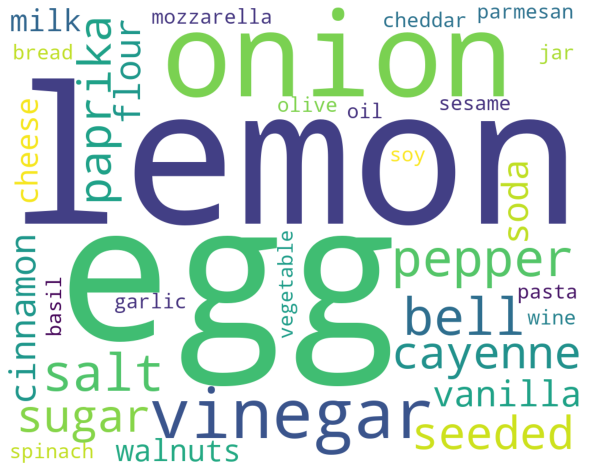

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' ' 

# iterate through the csv file 
for topic in topics_lsa_tf: 
  
    # split the value 
    tokens = topic.split()  
      
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                stopwords = our_stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 